# Clasificación de canciones
### Javier Andres Téllez Ortiz - 201917861


##### Se descarga el conjunto de datos y se descomprime

In [1]:
pip install wget

Note: you may need to restart the kernel to use updated packages.


In [2]:
import wget
from zipfile import ZipFile

##Se descarga el archivo del repositorio 
file = wget.download("http://millionsongdataset.com/sites/default/files/AdditionalFiles/msd_genre_dataset.zip")

##Se abre el archivo y se descomprime
zpFile = ZipFile(file)
zpFile.extractall()
zpFile.close()

100% [........................................................................] 12656044 / 12656044

##### Se abre el conjunto de datos, se eliminan los datos con algún elemento faltante y se examina la estructura del mismo.

In [13]:
import pandas as pd
import numpy as np

dataset = pd.read_csv("msd_genre_dataset.txt", skiprows = range(9))

dataset.dropna()
dataset.head()

,%genre,track_id,artist_name,title,loudness,tempo,time_signature,key,mode,duration,...,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
0,classic pop and rock,TRFCOOU128F427AEC0,Blue Oyster Cult,Mes Dames Sarat,-8.697,155.007,1,9,1,246.33424,...,1255.514569,580.030472,598.485223,575.337671,322.068603,321.726029,232.700609,186.805303,181.938688,151.508011
1,classic pop and rock,TRNJTPB128F427AE9F,Blue Oyster Cult,Screams,-10.659,148.462,1,4,0,189.80526,...,2007.653070,1043.474073,585.694981,564.013736,510.177022,400.200186,365.119588,238.099708,197.933757,251.577525
2,classic pop and rock,TRLFJHA128F427AEEA,Blue Oyster Cult,Dance The Night Away,-13.494,112.909,1,10,0,158.19710,...,1204.856777,2736.520024,730.233239,665.203452,535.775111,439.335059,486.822970,265.333860,447.097987,251.880724
3,classic pop and rock,TRCQZAG128F427DB97,Blue Oyster Cult,Debbie Denise,-12.786,117.429,4,7,1,250.22649,...,809.755802,563.908070,492.803819,378.382799,372.875044,231.941957,246.313305,168.400152,85.282462,339.897173
4,classic pop and rock,TRNXMNM128F427DB8C,Blue Oyster Cult,(Don't Fear) The Reaper,-14.093,141.536,4,9,0,307.06893,...,1093.684935,343.556047,889.163314,218.111796,304.862864,178.352161,440.478867,142.669283,81.061326,208.355152


##### Se generan los histogramas de todas las caracteristicas para el conjunto de datos, se evidencia que algunas de las variables no tienen una distribución aproximadamente normal.

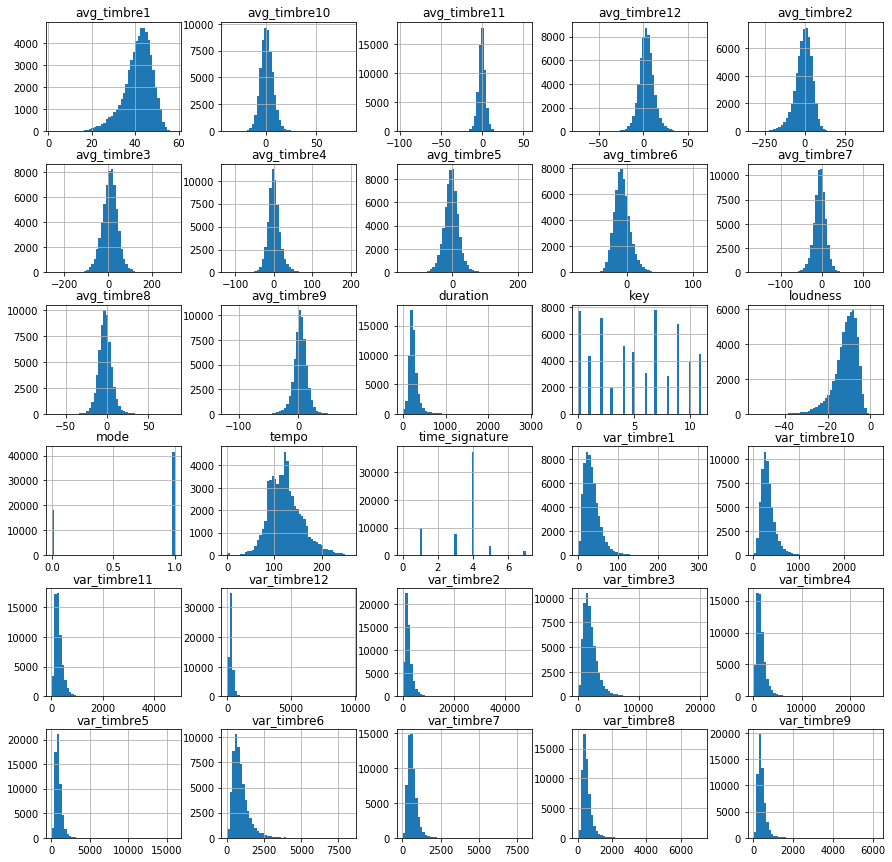

In [14]:
figure = dataset.hist(figsize=(15,15), bins = 50)

##### Se analiza la estructura de los datos de acuerdo con el género al que pertenecen. Se evidencia que, para las categorías de interés, la cantidad de datos es similar

In [15]:
pd.DataFrame(dataset["%genre"].value_counts())

,%genre
classic pop and rock,23895
folk,13192
dance and electronica,4935
jazz and blues,4334
soul and reggae,4016
punk,3200
metal,2103
classical,1874
pop,1617
hip-hop,434


##### Se obtienen algunos estadístios relevantes del conjunto de datos estudiado

In [16]:
dataset.describe()

,loudness,tempo,time_signature,key,mode,duration,avg_timbre1,avg_timbre2,avg_timbre3,avg_timbre4,...,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
count,59600.000000,59600.000000,59600.000000,59600.000000,59600.000000,59600.000000,59600.000000,59600.000000,59600.000000,59600.000000,...,59600.000000,59600.000000,59600.000000,59600.000000,59600.000000,59600.000000,59600.000000,59600.000000,59600.000000,59600.000000
mean,-11.466464,122.644482,3.509027,5.246913,0.698221,249.368358,41.271798,-7.839749,8.693922,0.673991,...,2086.250864,1607.670013,917.237656,915.557664,640.237565,519.352750,418.414959,332.625407,296.605875,318.402798
std,5.443875,35.026345,1.276733,3.578031,0.459034,124.893946,6.464746,53.460157,37.083264,16.630815,...,1275.619303,1070.795666,449.432854,560.966191,322.336675,292.539840,224.209344,160.086746,176.123726,172.836909
min,-54.352000,0.000000,0.000000,0.000000,0.000000,0.809340,1.749000,-318.656281,-257.525596,-120.723153,...,91.135450,89.873158,50.263681,30.938177,30.922193,30.063717,22.940235,21.861296,20.006805,21.180689
25%,-14.082000,97.593750,3.000000,2.000000,0.000000,180.923630,37.804325,-38.164928,-13.297080,-9.371414,...,1234.942691,932.625215,627.098804,539.826667,431.101134,335.118547,280.372758,228.582872,183.211753,220.061351
50%,-10.491000,120.008000,4.000000,5.000000,1.000000,228.675460,42.188843,-2.521511,10.010756,-0.521686,...,1809.291704,1362.507241,828.176782,786.076527,581.836336,456.921498,371.027720,303.594430,256.649101,287.583772
75%,-7.584000,142.873000,4.000000,9.000000,1.000000,287.790570,45.824781,28.638475,31.275820,9.248637,...,2610.696799,1968.422690,1100.478252,1137.946415,777.363086,624.078399,497.891767,399.912786,361.603655,373.889954
max,2.865000,260.547000,7.000000,11.000000,1.000000,2873.808530,58.011152,448.373214,305.121388,197.754968,...,20131.148234,25470.972456,16049.083490,8278.809040,8044.771043,7192.175853,6195.991985,2707.802218,4780.290858,9599.902501


##### Se eliminan de las columnas del conjunto de datos que no aportan información relevante o que no permitirían ejecutar el análisis de una forma adecuada

In [17]:
dataset = dataset.drop(columns = ["track_id", "artist_name", "title"])
features = dataset.columns.tolist()

##### Se obtienen los datos de las clases con los que se generará el modelo y se generan nuevamente los histogramas. De estos últimos, es posible afirmar que las distribuciones de cada una las caracteristicas de los datos estudiados se mantienen con respecto al conjunto completo.

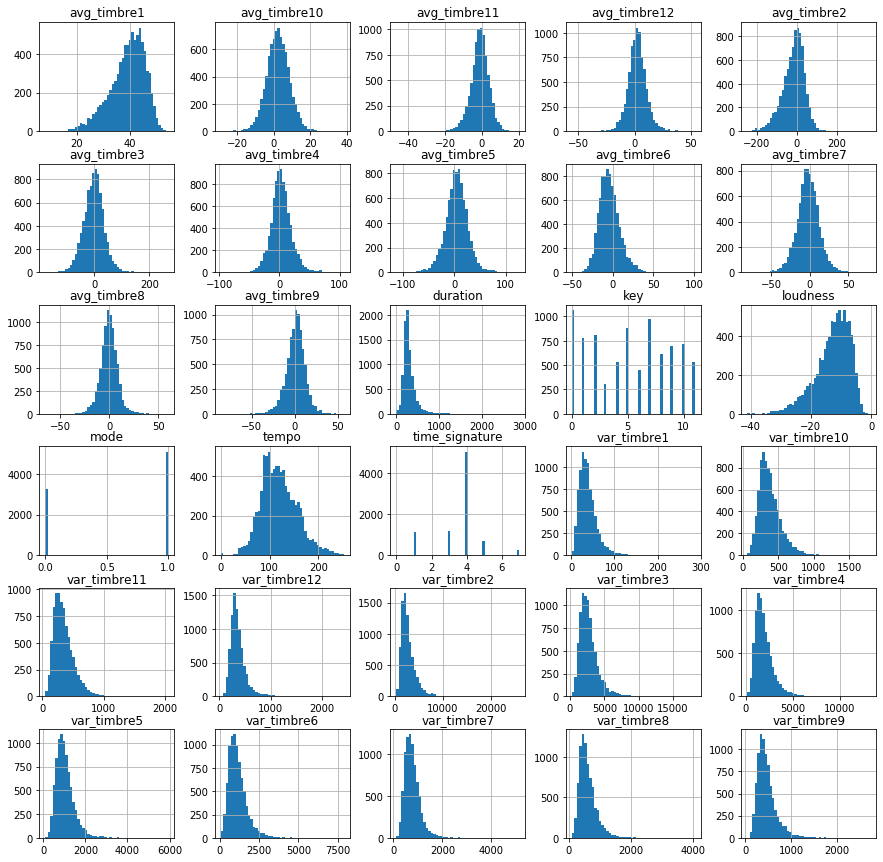

In [18]:
dataset = dataset[(dataset["%genre"] == "jazz and blues") | (dataset["%genre"] == "soul and reggae")]
figure = dataset.hist(figsize=(15,15), bins = 50)

##### Se divide la información del archivo entre etiquetas y carácteristicas

In [19]:
y = dataset["%genre"].values
X = dataset.values[:,1:]

##### Con el objetivo de observar el efecto de la estandarización sobre el rendimiento del modelo, se realiza este procedimiento sobre los datos

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

##Se estandarizan los datos provenientes del archivo
normalized_X = scaler.fit(X).transform(X)

##### Se dividen los datos entre conjunto de entrenamiento y conjunto de prueba, mantiendo el 20% de los datos para este último objetivo. Se observa que para el entrenamiento existe aproximadamente la misma cantidad de datos provenientes de ambas clases. 

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7861)
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(normalized_X, y, test_size = 0.2, random_state = 7861)

genres, cantidad = np.unique(y_train, return_counts = True)
print("Datos de entrenamiento clase %s: %d" % (genres[0],cantidad[0]))
print("Datos de entrenamiento clase %s: %d" % (genres[1],cantidad[1]))


Datos de entrenamiento clase jazz and blues: 3455
Datos de entrenamiento clase soul and reggae: 3225


##### Se realiza el entrenamiento para cada uno de los subconjuntos de datos y, tanto para los datos sin preprocesar como para los datos estandarizados. Es importante resaltar que para los casos en que los datos no estaban preprocesados, fue necesario aumentar el número de iteraciones máximas con el objetivo de que el algoritmo sea capaz de converger adecuadamente.

In [22]:
from sklearn.linear_model import LogisticRegression

datos_totales = X_train.shape[0]

datos_10 = (int) (datos_totales/10)
datos_20 = (int) (datos_totales/5)
datos_50 = (int) (datos_totales/2)

logRegression_10 = LogisticRegression(max_iter = 4800).fit( X_train[0: datos_10], y_train[0: datos_10])
logRegression_10_std = LogisticRegression().fit( X_train_std[0: datos_10], y_train_std[0: datos_10])

logRegression_20 = LogisticRegression(max_iter = 8000).fit( X_train[0: datos_20], y_train[0: datos_20])
logRegression_20_std = LogisticRegression().fit( X_train_std[0: datos_20], y_train_std[0: datos_20])

logRegression_50 = LogisticRegression(max_iter = 10000).fit( X_train[0: datos_50], y_train[0: datos_50])
logRegression_50_std = LogisticRegression().fit( X_train_std[0: datos_50], y_train_std[0: datos_50])

logRegression = LogisticRegression(max_iter = 10000).fit( X_train, y_train)
logRegression_std = LogisticRegression().fit( X_train_std, y_train_std )


##### Se evalúan cada uno de los modelos entrenados y se reportan los resultados en la tabla mostrada. Es posible afirmar a partir de dichos resultados que la estandarización de los datos permitió una convergencia más rápida, pero no se evidencia un aumento significativo en el desempeño del modelo.

In [23]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, log_loss

f1_score_list = []
precision_list = []
recall_list = []
log_loss_list = []

models = [logRegression_10, logRegression_20, logRegression_50, logRegression,
          logRegression_10_std, logRegression_20_std, logRegression_50_std, logRegression_std]

test_data = [X_test, X_test, X_test,  X_test, X_test_std, X_test_std, X_test_std, X_test_std]
test_target = [y_test, y_test, y_test, y_test, y_test_std, y_test_std, y_test_std, y_test_std]

for model,data,target in zip(models, test_data, test_target):

    y_hat = model.predict(data)
    f1_score_list.append(f1_score(target, y_hat, pos_label = "jazz and blues"))
    precision_list.append(precision_score(target, y_hat, pos_label = "jazz and blues"))
    recall_list.append(recall_score(target, y_hat, pos_label = "jazz and blues"))

    y_hat = model.predict_proba(data)
    log_loss_list.append(log_loss(target, y_hat))
    
model_results = pd.DataFrame({
    "Porcentaje de datos" : ["10%", "20%", "50%", "100%", 
                             "10%(std)", "20%(std)", "50%(std)", "100%(std)"],    
    "Precisión" : precision_list,
    "Recall" : recall_list,
    "F1" : f1_score_list,
    "Log loss" : log_loss_list   
})

model_results

,Porcentaje de datos,Precisión,Recall,F1,Log loss
0,10%,0.834292,0.824801,0.829519,0.433531
1,20%,0.836994,0.823663,0.830275,0.422269
2,50%,0.843641,0.822526,0.832949,0.397687
3,100%,0.842410,0.827076,0.834673,0.390418
4,10%(std),0.836028,0.823663,0.829799,0.427644
5,20%(std),0.841307,0.820250,0.830645,0.419614
6,50%(std),0.843823,0.823663,0.833621,0.397824
7,100%(std),0.845444,0.833902,0.839633,0.390670


#### Se generan las matrices de confusión para los modelos entrenados con la totalidad de los datos. Pese a que el modelo con datos estandarizados tiene una menor cantidad de falsos positivos y falsos negativos, no es posible afirmar que el modelo resultante clasifica adecuadamente los datos.

In [27]:
confusion_matrix(y_test, logRegression.predict(X_test))

array([[727, 152],
       [136, 655]], dtype=int64)

In [28]:
confusion_matrix(y_test_std, logRegression_std.predict(X_test_std))

array([[733, 146],
       [134, 657]], dtype=int64)

## Conclusiones
- Es posible afirmar que el modelo obtenido no generaliza adecuadamente la relación entre las varibles de los datos estudiados. Por lo que se hace necesaria la implementación de un modelo de mayor complejidad que capture adecuadamente las relaciones entre variables.
- Para los casos estudiados, las estandarización de los datos no generó un impacto significativo en el rendimiento de los modelos. Sin embargo, en la fase de entrenamiento, este procedimiento permitió una convergencia más rápida del algoritmo de optimización.
- En caso de incluir en las características el nombre del artista es muy probable que mejoren las estimaciones del modelo. Por otro lado, si se desearía incluir el título de la canción, sería necesario incluir un análisis más profundo que incluya un modelamiento semántico de éste. 